In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import MiniBatchKMeans
from math import sqrt
import cv2

import groupXY_functions as util

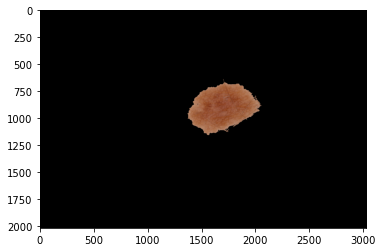

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[105, 153, 158] [105, 153, 158] 0.0
[105, 153, 158] [118, 151, 157] 13.19090595827292
[105, 153, 158] [124, 150, 158] 19.235384061671343
[105, 153, 158] [138, 146, 154] 33.97057550292606
[118, 151, 157] [105, 153, 158] 13.19090595827292
[118, 151, 157] [118, 151, 157] 0.0
[118, 151, 157] [124, 150, 158] 6.164414002968976
[118, 151, 157] [138, 146, 154] 20.83266665599966
[124, 150, 158] [105, 153, 158] 19.235384061671343
[124, 150, 158] [118, 151, 157] 6.164414002968976
[124, 150, 158] [124, 150, 158] 0.0
[124, 150, 158] [138, 146, 154] 15.0996688705415
[138, 146, 154] [105, 153, 158] 33.97057550292606
[138, 146, 154] [118, 151, 157] 20.83266665599966
[138, 146, 154] [124, 150, 158] 15.0996688705415
[138, 146, 154] [138, 146, 154] 0.0
the color variation in the lesion equals 33.97057550292606


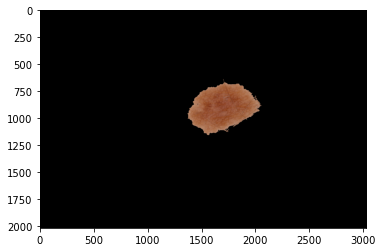

In [4]:
path = "ISIC_0001769"
# load the image and grab width and height
image = plt.imread(f'data/example_image/{path}.jpg')

#load the segmentation mask
mask = plt.imread(f'data/example_segmentation/{path}_segmentation.png')

#extract a new mask (cutting out more of the skin) from the original image
_, mask2 = util.extract_mask_roi(image, mask, 20, 20)

#apply the new mask on the image
image[mask2==0] = 0 

plt.imshow(image)
#convert the image from the RGB color space to the L*a*b* for euclidean distance
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#reshape the image into a feature vector so that k-means can be applied
#lose xy information to focus on colors
image = image.reshape((image.shape[0] * image.shape[1], 3))

#REDUCING COLORS
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 16)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#filter to unique colors
colors = np.unique(quant, axis = 0)

#filter out all black pixels
#colors[0] refers to the luminanace row in L*a*b*
colors_ = np.delete(colors, np.where(colors == 0)[0], axis=0) 

#CALCULATIONS
#The calculations take luminance into consideration.

#conversion to a python list
color_variance = colors_.tolist()

#calculate euclidean distances between colors using pythagoras theorem for 3D space
max_distance = 0
for i in color_variance:
    for j in color_variance:
        distance = sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2 + (i[2]-j[2])**2)
        print(i,j,distance)
        if distance > max_distance:
            max_distance = distance

print(f'the color variation in the lesion equals {max_distance}')

[110, 152, 157] [110, 152, 157] 0.0
[110, 152, 157] [112, 152, 159] 2.8284271247461903
[110, 152, 157] [112, 154, 168] 11.357816691600547
[110, 152, 157] [132, 148, 156] 22.38302928559939
[112, 152, 159] [110, 152, 157] 2.8284271247461903
[112, 152, 159] [112, 152, 159] 0.0
[112, 152, 159] [112, 154, 168] 9.219544457292887
[112, 152, 159] [132, 148, 156] 20.615528128088304
[112, 154, 168] [110, 152, 157] 11.357816691600547
[112, 154, 168] [112, 152, 159] 9.219544457292887
[112, 154, 168] [112, 154, 168] 0.0
[112, 154, 168] [132, 148, 156] 24.08318915758459
[132, 148, 156] [110, 152, 157] 22.38302928559939
[132, 148, 156] [112, 152, 159] 20.615528128088304
[132, 148, 156] [112, 154, 168] 24.08318915758459
[132, 148, 156] [132, 148, 156] 0.0
the color variation in the lesion equals 24.08318915758459


In [1]:
import groupXY_functions as util

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[78, 142, 84] [78, 142, 84] 0.0
[78, 142, 84] [107, 135, 92] 30.886890422961002
[107, 135, 92] [78, 142, 84] 30.886890422961002
[107, 135, 92] [107, 135, 92] 0.0
the color variation in the lesion equals 30.886890422961002


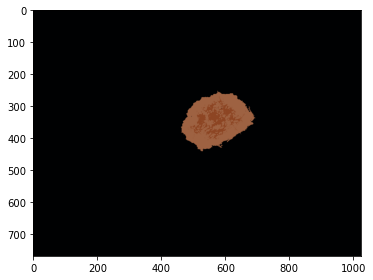

In [2]:
path = "ISIC_0001769"
util.color_variance(path)